In [13]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set(font_scale=0.6)

In [14]:
# Import Data

X, y = load_iris(return_X_y=True, as_frame=True)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


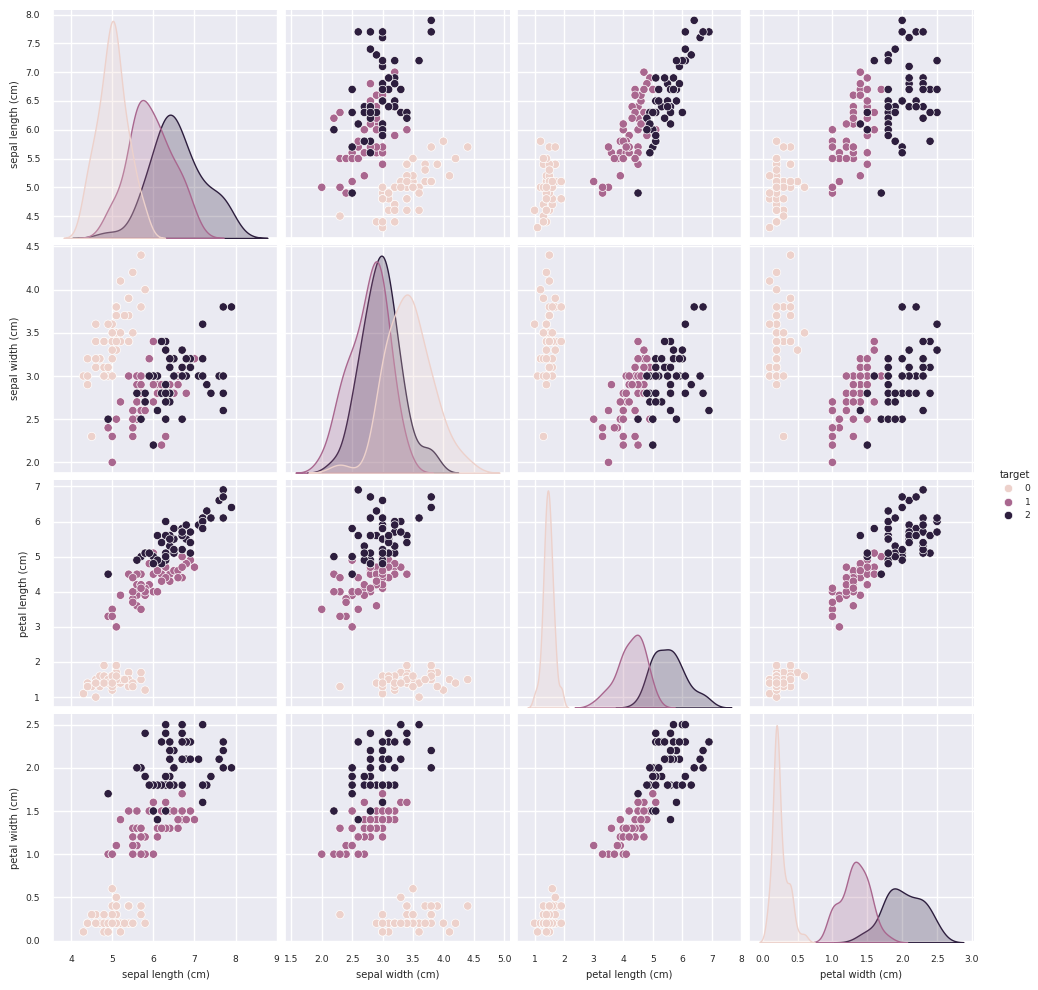

In [17]:
sns.pairplot(data=pd.concat([X, y], axis=1), hue='target')

In [3]:
# Model training + cluster inference

clf = KMeans(n_clusters=3)
clf.fit(X)
clusters = clf.predict(X)

# for petal only use X.iloc[:, 2:]

In [4]:
# Dimention reduction from 4 to 2 dimensions

pca = PCA(2)
pca.fit(X)
X_2d = pca.transform(X)

[]

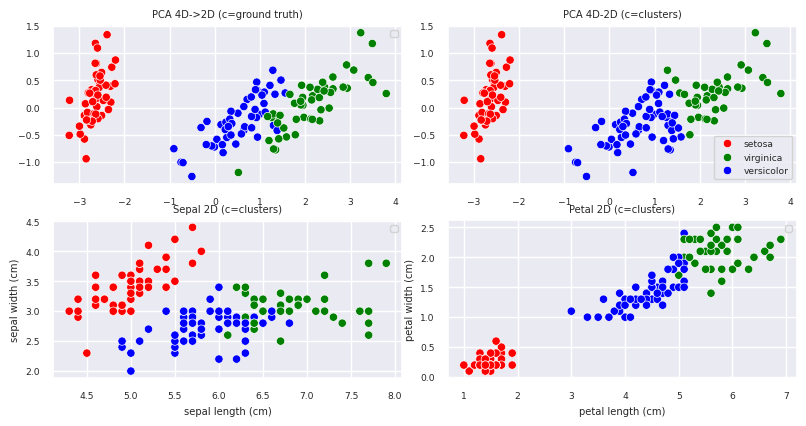

In [11]:
y_palette = {'setosa': "red", 'versicolor': "blue", 'virginica': "green"}
c_palette = {'setosa': "red", 'virginica': "green", 'versicolor': "blue"}

y_names = [list(y_palette.keys())[i] for i in y]
c_names = [list(c_palette.keys())[i] for i in clusters]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 4))
plt.tight_layout()
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y_names, palette=y_palette, ax=ax[0, 0]).set_title('PCA 4D->2D (c=ground truth)')
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=c_names, palette=c_palette, ax=ax[0, 1]).set_title('PCA 4D-2D (c=clusters)')
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=c_names, palette=c_palette, ax=ax[1, 0]).set_title('Sepal 2D (c=clusters)')
sns.scatterplot(x=X.iloc[:, 2], y=X.iloc[:, 3], hue=c_names, palette=c_palette, ax=ax[1, 1]).set_title('Petal 2D (c=clusters)')

ax[0, 0].legend('')
ax[1, 0].legend('')
ax[1, 1].legend('')
    
plt.plot()